In [1]:
default_headers = {
          'Content-Type': 'application/json',
          'Access-Control-Allow-Origin': '*'
        }

In [2]:
from IPython.display import display_javascript, display_html, display
import uuid

class RenderJSON(object):
    def __init__(self, json_data):
        if isinstance(json_data, dict):
            self.json_str = json.dumps(json_data)
        elif isinstance(json_data, list):
            self.json_str = json.dumps(json_data)
        else:
            self.json_str = json
        self.uuid = str(uuid.uuid4())
        
    def _ipython_display_(self):
        display_html('<div id="{}" style="height: 150px; width:100%;"></div>'.format(self.uuid),
            raw=True
        )
        display_javascript("""
        require(["https://rawgit.com/caldwell/renderjson/master/renderjson.js"], function() {
          document.getElementById('%s').appendChild(renderjson(%s))
        });
        """ % (self.uuid, self.json_str), raw=True)

In [3]:
import requests, json

In [4]:
engine = "http://jasper:8181"

In [5]:
e = requests.get(engine + "/jasper").json()

In [6]:
RenderJSON(e)

In [7]:
l = requests.get(engine + "/jasper/streams").json()

In [8]:
RenderJSON(l)

In [9]:
qs = requests.get(engine + "/jasper/queries").json()

In [10]:
body = {
    'id':'redgreen',
    'tbox': 'https://raw.githubusercontent.com/riccardotommasini/colorwave/master/colors.owl',
    'format':'JSON',
    'body': '''
    
SELECT (COUNT(?r) AS ?cntr) (count(?g) AS ?cntg) ((?cntr>?cntg) as ?moreRedsThanGreens)
FROM NAMED WINDOW <rw> ON <http://redstream:1255/red> [RANGE PT15S STEP PT5S]
FROM NAMED WINDOW <gw> ON <http://greenstream:2255/green> [RANGE PT15S STEP PT5S]
WHERE {
    { WINDOW <rw> { ?r a <http://www.streamreasoning.org/ontologies/2018/9/colors#Red> .} }
    UNION 
    { WINDOW <gw> { ?g a <http://www.streamreasoning.org/ontologies/2018/9/colors#Green> .} }
}

    '''
}
    
data = json.dumps(body)

RenderJSON(body)


In [11]:
q = requests.post(engine + "/jasper/queries", data = data, headers=default_headers)

In [12]:
RenderJSON(requests.get(engine + "/jasper/queries").json())

In [13]:
RenderJSON(q.json())

In [14]:
o = requests.post(engine + "/jasper/observers/redgreen", data = json.dumps({'protocol':"HTTP", "retention":5}) , headers=default_headers).json()

In [15]:
RenderJSON(o)

In [47]:
a = requests.get("http://jasper:8182/jasper/streams/redgreen/observers/260754199").json()
RenderJSON(a)

In [65]:
from pandas.io.json import json_normalize
import pandas as pd
def flatten_json(y):
    out = {}

    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x

    flatten(y)
    return out

def coerce_df_columns_to_numeric(df, column_list):
    df[column_list] = df[column_list].apply(pd.to_numeric, errors='coerce')

In [66]:
data = [flatten_json(b) for b in a]
df = pd.DataFrame.from_dict(data, orient='columns')
df

,head_vars_0,head_vars_1,head_vars_2,results_bindings_0_cntg_datatype,results_bindings_0_cntg_type,results_bindings_0_cntg_value,results_bindings_0_cntr_datatype,results_bindings_0_cntr_type,results_bindings_0_cntr_value,results_bindings_0_moreRedsThanGreens_datatype,results_bindings_0_moreRedsThanGreens_type,results_bindings_0_moreRedsThanGreens_value
0,cntr,cntg,moreRedsThanGreens,http://www.w3.org/2001/XMLSchema#integer,literal,6,http://www.w3.org/2001/XMLSchema#integer,literal,4,http://www.w3.org/2001/XMLSchema#boolean,literal,false
1,cntr,cntg,moreRedsThanGreens,http://www.w3.org/2001/XMLSchema#integer,literal,6,http://www.w3.org/2001/XMLSchema#integer,literal,6,http://www.w3.org/2001/XMLSchema#boolean,literal,false
2,cntr,cntg,moreRedsThanGreens,http://www.w3.org/2001/XMLSchema#integer,literal,5,http://www.w3.org/2001/XMLSchema#integer,literal,5,http://www.w3.org/2001/XMLSchema#boolean,literal,false
3,cntr,cntg,moreRedsThanGreens,http://www.w3.org/2001/XMLSchema#integer,literal,5,http://www.w3.org/2001/XMLSchema#integer,literal,4,http://www.w3.org/2001/XMLSchema#boolean,literal,false
4,cntr,cntg,moreRedsThanGreens,http://www.w3.org/2001/XMLSchema#integer,literal,3,http://www.w3.org/2001/XMLSchema#integer,literal,4,http://www.w3.org/2001/XMLSchema#boolean,literal,true


In [67]:
coerce_df_columns_to_numeric(df, ['results_bindings_0_cntr_value', 'results_bindings_0_cntg_value'])

In [68]:
df

,head_vars_0,head_vars_1,head_vars_2,results_bindings_0_cntg_datatype,results_bindings_0_cntg_type,results_bindings_0_cntg_value,results_bindings_0_cntr_datatype,results_bindings_0_cntr_type,results_bindings_0_cntr_value,results_bindings_0_moreRedsThanGreens_datatype,results_bindings_0_moreRedsThanGreens_type,results_bindings_0_moreRedsThanGreens_value
0,cntr,cntg,moreRedsThanGreens,http://www.w3.org/2001/XMLSchema#integer,literal,6,http://www.w3.org/2001/XMLSchema#integer,literal,4,http://www.w3.org/2001/XMLSchema#boolean,literal,false
1,cntr,cntg,moreRedsThanGreens,http://www.w3.org/2001/XMLSchema#integer,literal,6,http://www.w3.org/2001/XMLSchema#integer,literal,6,http://www.w3.org/2001/XMLSchema#boolean,literal,false
2,cntr,cntg,moreRedsThanGreens,http://www.w3.org/2001/XMLSchema#integer,literal,5,http://www.w3.org/2001/XMLSchema#integer,literal,5,http://www.w3.org/2001/XMLSchema#boolean,literal,false
3,cntr,cntg,moreRedsThanGreens,http://www.w3.org/2001/XMLSchema#integer,literal,5,http://www.w3.org/2001/XMLSchema#integer,literal,4,http://www.w3.org/2001/XMLSchema#boolean,literal,false
4,cntr,cntg,moreRedsThanGreens,http://www.w3.org/2001/XMLSchema#integer,literal,3,http://www.w3.org/2001/XMLSchema#integer,literal,4,http://www.w3.org/2001/XMLSchema#boolean,literal,true


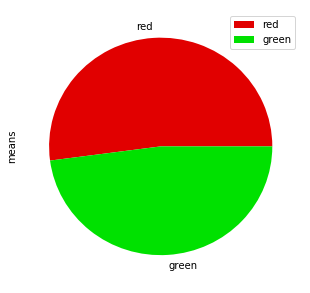

In [69]:
df1 = df[['results_bindings_0_cntg_value','results_bindings_0_cntr_value']]
cntg_mean = df1['results_bindings_0_cntg_value'].mean()
cntr_mean = df1['results_bindings_0_cntr_value'].mean()

df = pd.DataFrame({'means': [cntg_mean, cntr_mean]}, index=['red', 'green'])
plot = df.plot.pie(y='means', colors=["#e10000", "#00e100"], figsize=(5, 5))